In [131]:
#load dataset
df = pd.read_csv('Wine Quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [152]:
#change the quality values to 0 and 1
#quality greater than equals to 7 ---->GOOD
#quality less than  7 ---->NOT GOOD
df.loc[df['quality'] < 7, 'quality'] = 0
df.loc[df['quality'] >= 7, 'quality'] = 1
df.head(8)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0


In [133]:
#replace zero values with mean value

zero_not_accepted = ['citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

#replace zero value of the columns in NaN values
for column in zero_not_accepted:
    df[column] = df[column].replace(0,np.NaN)
    #find the mean value of NaN & replace NaN with the value.
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN,mean)

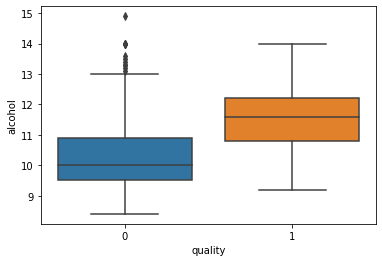

In [147]:
sns.boxplot(x="quality", y="alcohol",data = df)

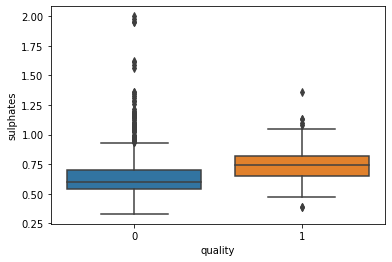

In [149]:
sns.boxplot(y = 'sulphates',x = 'quality',data = df)

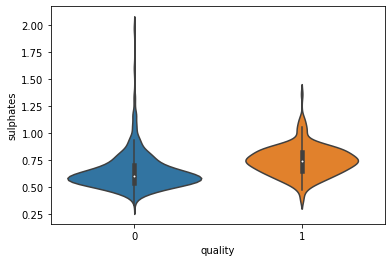

In [151]:
sns.violinplot(y = 'sulphates',x = 'quality',data = df)

In [116]:
df = df.drop(columns = ['fixed acidity','volatile acidity','density','pH'])
df.head()

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0
1,0.00,2.6,0.098,25.0,67.0,0.68,9.8,0
2,0.04,2.3,0.092,15.0,54.0,0.65,9.8,0
3,0.56,1.9,0.075,17.0,60.0,0.58,9.8,0
4,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#split the dataset
X = df.iloc[:,0:7].round()
y = df.iloc[:,7].round()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)



In [119]:
#feature scaling

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train).round()
X_test = sc_x.transform(X_test).round()



In [120]:
y_train

642     0
679     0
473     0
390     1
1096    0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: quality, Length: 1279, dtype: int64

In [121]:
import math
math.sqrt(len(y_test))

#k = 17 

17.88854381999832

In [122]:
##
#define KNN Model
classifier = KNeighborsClassifier(n_neighbors = 11,p = 2,metric = 'euclidean')
#p=2 ..diabetic or not so 2 results

#fit the model
classifier.fit(X_train,y_train)

#KNeighborsClassifier(algorithm = 'auto',leaf_size = 30,metric = 'euclidean',metric_params = None,n_jobs =1,p =2,weights = 'uniform')

#predict testset results
y_pred  =classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
#Evaluate model
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[284   6]
 [ 26   4]]


In [125]:
print(f1_score(y_test,y_pred))

0.2


In [126]:
print(accuracy_score(y_test,y_pred))

0.9
